<a href="https://www.kaggle.com/code/eavprog/abscur-pred-multiinput?scriptVersionId=149202595" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 37.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 3.6 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=4143a24f7ddd9dda32d3ad80eb59e0d0d168e0fe85ce7ba6b9b21f38d87fe5df
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.158956,1.818919,0.119259,1.897109,14.116451,12.509395,14.600312,17.559024,2.298456,0.637020,...,0.139147,4.185132,3.876549,3.966075,3.762882,0.430117,6.332519,0.455737,0.937316,0.000663
2014-11-25,12.044308,1.819097,0.119668,1.901637,14.118608,12.536657,14.638256,17.611234,2.300944,0.638980,...,0.138826,4.219927,3.877141,3.979315,3.763557,0.430445,6.363173,0.456440,0.940802,0.000661
2014-11-26,12.045096,1.818015,0.119896,1.907374,14.106443,12.535414,14.672678,17.641765,2.297993,0.640031,...,0.138706,4.223107,3.874864,3.999899,3.759412,0.430863,6.384161,0.456593,0.942125,0.000660
2014-11-27,12.057546,1.823940,0.119978,1.903102,14.143674,12.472507,14.664640,17.627145,2.303418,0.638720,...,0.139073,4.218970,3.885091,3.987278,3.769335,0.431604,6.411457,0.457798,0.944612,0.000662
2014-11-28,12.071859,1.828944,0.119487,1.909259,14.198460,12.432844,14.705636,17.675700,2.311035,0.640490,...,0.139817,4.241512,3.899926,3.997314,3.783431,0.432484,6.396279,0.458311,0.948524,0.000667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-30,13.870554,2.786368,0.145760,1.957068,21.788676,15.768249,24.154793,23.093256,2.976371,0.942782,...,0.077603,5.206623,5.985900,4.662075,5.810933,0.607096,0.776179,0.672345,0.595807,0.000894
2023-10-31,13.858147,2.788922,0.144452,1.960898,21.814621,15.779472,24.089056,23.099873,2.980912,0.941015,...,0.077696,5.198265,5.993028,4.646451,5.818008,0.604451,0.777104,0.673145,0.596517,0.000896
2023-11-01,13.955186,2.786528,0.144726,1.956410,21.792539,15.785873,24.083976,23.094442,2.979053,0.935760,...,0.077617,5.193003,5.986961,4.637204,5.809175,0.603003,0.776317,0.672464,0.595913,0.000895


# Сборка датасета

In [5]:
forecast_length = 10

# Get time series from dataframe
target_name = abscur_data.columns[0]
target_train = np.ravel(abscur_data[target_name].values[:-forecast_length])
target_test = np.ravel(abscur_data[target_name].values[-forecast_length:])

idx_train = abscur_data.index[:-forecast_length]
idx_test = abscur_data.index[-forecast_length:]

In [6]:
historical_data_inp = {}

for inp_name in abscur_data.columns[:2]:
    history = np.ravel(abscur_data[inp_name].values)
    
    historical_data_inp[inp_name] = history[:-forecast_length]
    

In [7]:
historical_data_inp

{'AUD': array([12.15895606, 12.04430842, 12.04509645, ..., 13.80744777,
        13.82399175, 13.88743227]),
 'HKD': array([1.81891852, 1.81909707, 1.8180148 , ..., 2.79672451, 2.78960823,
        2.79390394])}

# Сборка модели

In [8]:
fedot = Fedot(problem='ts_forecasting',
              task_params=TsForecastingParams(forecast_length=forecast_length),
              timeout=1)

# Обучение модели

In [9]:
fedot.fit(features=historical_data_inp,
                     target=historical_data_inp[target_name])

2023-11-03 17:53:35,250 - Unknown integration target: 
2023-11-03 17:53:41,755 - Unknown integration target: 
2023-11-03 17:53:48,604 - Unknown integration target: 
2023-11-03 17:53:55,422 - Unknown integration target: 
2023-11-03 17:54:01,891 - Unknown integration target: 
2023-11-03 17:54:16,239 - Unknown integration target: 
2023-11-03 17:54:30,705 - Unknown integration target: 
2023-11-03 17:54:45,244 - Unknown integration target: 
2023-11-03 17:54:47,307 - Unknown integration target: 
2023-11-03 17:54:47,311 - Unknown integration target: 
2023-11-03 17:55:04,907 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 262.9 MiB, max: 266.4 MiB
2023-11-03 17:55:04,912 - ApiComposer - Initial pipeline was fitted in 15.3 sec.
2023-11-03 17:55:04,917 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-03 17:55:04,951 - ApiComposer - AutoML configured. Parameters tuning: True. Time l

{'depth': 5, 'length': 11, 'nodes': [ridge, ridge, glm, data_source_ts/AUD, ridge, lagged, ridge, glm, data_source_ts/HKD, ridge, lagged]}

# Вид сети

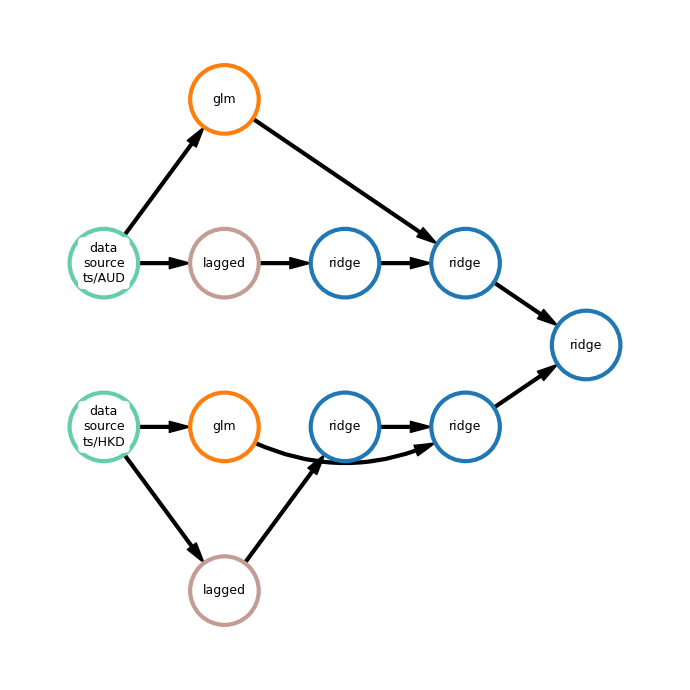

In [10]:
fedot.current_pipeline.show()

In [11]:
fedot.current_pipeline.print_structure()

Pipeline structure:
{'depth': 5, 'length': 11, 'nodes': [ridge, ridge, glm, data_source_ts/AUD, ridge, lagged, ridge, glm, data_source_ts/HKD, ridge, lagged]}
ridge - {'alpha': 8.704178524809205}
ridge - {'alpha': 9.0969499769229}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
data_source_ts/AUD - {}
ridge - {'alpha': 1.825740527635954}
lagged - {'window_size': 10}
ridge - {'alpha': 2.369391282228279}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
data_source_ts/HKD - {}
ridge - {'alpha': 8.528303926735612}
lagged - {'window_size': 10}


# Предсказание

In [12]:
forecast = fedot.predict(historical_data_inp,in_sample=False)
forecast

array([13.88155081, 13.88273858, 13.88399234, 13.88531836, 13.88657667,
       13.88779834, 13.88895246, 13.89008705, 13.89123741, 13.89247828])

# Расчет метрик

In [13]:
fedot.get_metrics(target_test,metric_names=['mae','mape'])

{'mae': 0.049, 'mape': 0.004}

# График

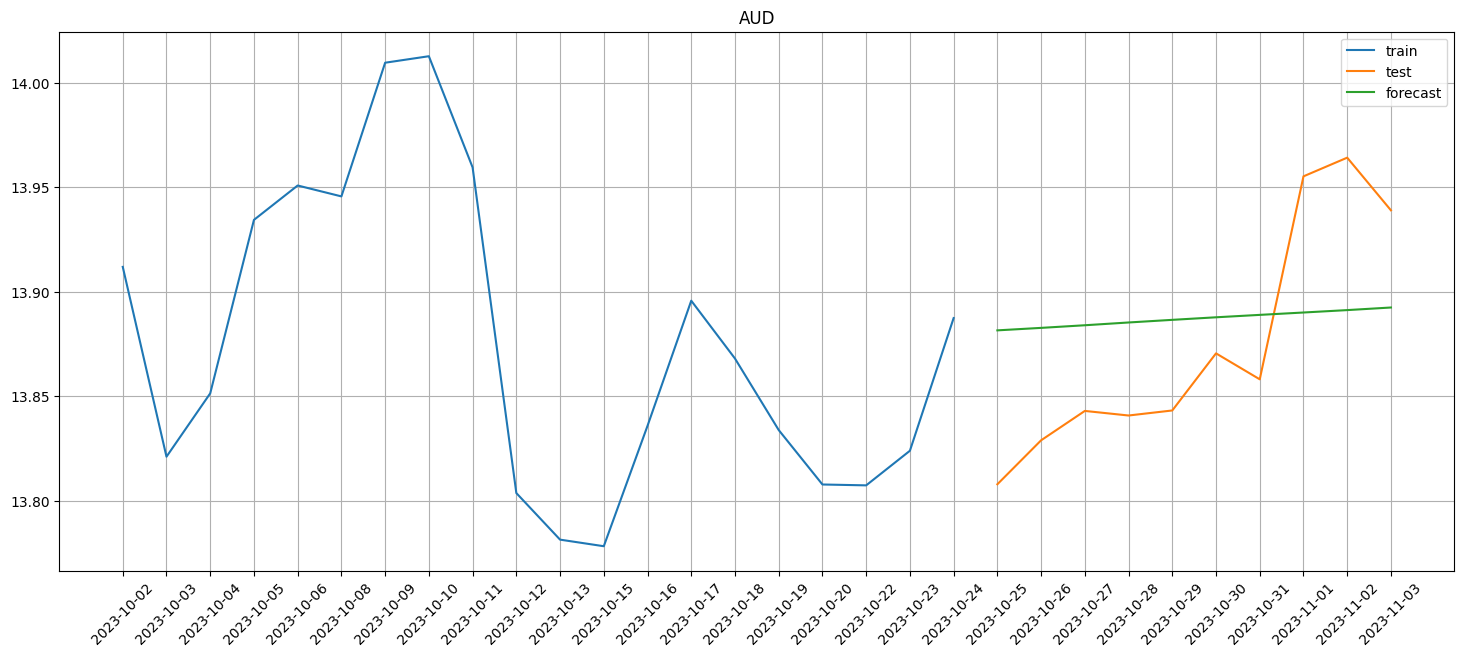

In [14]:
plt.plot(idx_train[-20:],target_train[-20:],label='train')
plt.plot(idx_test,target_test,label='test')
plt.plot(idx_test,forecast,label='forecast')
plt.grid()
plt.legend()
plt.title(target_name)
plt.xticks(rotation=45)
plt.show()